<a href="https://colab.research.google.com/github/RissanX/food-sales-predicitons/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
filename= '/content/drive/MyDrive/DataSets/sales_predictions_2023.csv'

In [2]:
df= pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.shape

(8523, 12)

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [7]:
df[df.duplicated(keep=False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [8]:
df.duplicated().sum()

0

In [9]:
df.duplicated(['Item_Identifier']).sum()

6964

In [10]:
df.duplicated(['Item_Identifier']).value_counts()

True     6964
False    1559
dtype: int64

In [11]:
df.duplicated(['Item_Identifier'],keep=False)

0       True
1       True
2       True
3       True
4       True
        ... 
8518    True
8519    True
8520    True
8521    True
8522    True
Length: 8523, dtype: bool

In [12]:
df.drop_duplicates(['Item_Identifier'],inplace=True)
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1399,FDD57,18.10,Low Fat,0.022400,Fruits and Vegetables,96.0094,OUT046,1997,Small,Tier 1,Supermarket Type1,1808.9786
956,FDR14,11.65,Low Fat,0.175034,Dairy,55.5298,OUT017,2007,NaN,Tier 2,Supermarket Type1,647.1576
1304,FDQ32,17.85,Regular,0.046798,Fruits and Vegetables,123.8388,OUT018,2009,Medium,Tier 3,Supermarket Type2,866.8716
20,FDN22,18.85,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,High,Tier 3,Supermarket Type1,3775.0860
1004,DRG03,14.50,Low Fat,0.061935,Dairy,154.4998,OUT013,1987,High,Tier 3,Supermarket Type1,1691.7978
115,FDD17,7.50,Low Fat,0.032678,Frozen Foods,239.0906,OUT049,1999,Medium,Tier 1,Supermarket Type1,5942.2650
1670,NCQ06,NaN,Low Fat,0.073229,Household,254.1014,OUT019,1985,Small,Tier 1,Grocery Store,255.0014
2851,FDI58,7.64,Regular,0.070646,Snack Foods,91.2120,OUT013,1987,High,Tier 3,Supermarket Type1,466.0600
2645,NCF43,8.51,Low Fat,0.051936,Household,142.9470,OUT035,2004,Small,Tier 2,Supermarket Type1,3006.0870
2385,FDU24,6.78,Regular,0.140956,Baking Goods,92.2120,OUT017,2007,NaN,Tier 2,Supermarket Type1,4101.3280


In [13]:
df['Outlet_Size'].value_counts()

Medium    472
Small     445
High      186
Name: Outlet_Size, dtype: int64

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    929
Regular    532
LF          61
reg         19
low fat     18
Name: Item_Fat_Content, dtype: int64

In [15]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')

In [16]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

In [17]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')

In [18]:
df['Item_Fat_Content'].value_counts()

Low Fat    1008
Regular     551
Name: Item_Fat_Content, dtype: int64

In [19]:
df['Item_Type'].value_counts()

Fruits and Vegetables    220
Snack Foods              220
Household                170
Frozen Foods             155
Dairy                    125
Canned                   120
Baking Goods             119
Health and Hygiene        95
Soft Drinks               80
Meat                      80
Breads                    45
Hard Drinks               40
Starchy Foods             30
Others                    30
Breakfast                 20
Seafood                   10
Name: Item_Type, dtype: int64

In [20]:
df['Outlet_Type'].value_counts()

Supermarket Type1    1062
Grocery Store         183
Supermarket Type3     158
Supermarket Type2     156
Name: Outlet_Type, dtype: int64

In [21]:
print('Item outlet sales')
print('mean:',df['Item_Outlet_Sales'].mean(),'\n')
print('max:',df['Item_Outlet_Sales'].max(),'\n')
print('min:',df['Item_Outlet_Sales'].min(),'\n')

Item outlet sales
mean: 2192.905187427838 

max: 11445.102 

min: 37.2848 



In [22]:
print('Item MRP')
print('mean:',df['Item_MRP'].mean(),'\n')
print('max:',df['Item_MRP'].max(),'\n')
print('min:',df['Item_MRP'].min(),'\n')

Item MRP
mean: 140.9663558691469 

max: 265.2226 

min: 31.29 



In [23]:
print('Item Weight')
print('mean:',df['Item_Weight'].mean(),'\n')
print('max:',df['Item_Weight'].max(),'\n')
print('min:',df['Item_Weight'].min(),'\n')

Item Weight
mean: 12.804567049808428 

max: 21.35 

min: 4.555 



In [25]:
df['Item_Weight'].fillna(value =df['Item_Weight'].mean(),inplace=True )
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
6440,FDD28,10.695000,Low Fat,0.053380,Frozen Foods,56.7904,OUT049,1999,Medium,Tier 1,Supermarket Type1,1113.2176
6526,FDU43,12.804567,Regular,0.057762,Fruits and Vegetables,237.3564,OUT027,1985,Medium,Tier 3,Supermarket Type3,2145.2076
6892,NCF55,6.675000,Low Fat,0.021710,Household,34.9874,OUT045,2002,NaN,Tier 2,Supermarket Type1,247.0118
7039,NCW30,5.210000,Low Fat,0.011072,Household,257.8962,OUT017,2007,NaN,Tier 2,Supermarket Type1,4402.9354


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 7298
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            1559 non-null   object 
 1   Item_Weight                1559 non-null   float64
 2   Item_Fat_Content           1559 non-null   object 
 3   Item_Visibility            1559 non-null   float64
 4   Item_Type                  1559 non-null   object 
 5   Item_MRP                   1559 non-null   float64
 6   Outlet_Identifier          1559 non-null   object 
 7   Outlet_Establishment_Year  1559 non-null   int64  
 8   Outlet_Size                1103 non-null   object 
 9   Outlet_Location_Type       1559 non-null   object 
 10  Outlet_Type                1559 non-null   object 
 11  Item_Outlet_Sales          1559 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 158.3+ KB


In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)

In [29]:
num_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000
mean,12.804567,0.065113,140.966356,1997.817191,2192.905187
std,4.234764,0.049937,62.082294,8.332658,1689.872821
min,4.555000,0.000000,31.290000,1985.000000,37.284800
25%,9.285000,0.026910,94.012000,1987.000000,864.208400
50%,12.804567,0.053527,142.283800,1999.000000,1813.639200
75%,16.000000,0.093756,185.374000,2004.000000,3047.033700
max,21.350000,0.294939,265.222600,2009.000000,11445.102000


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

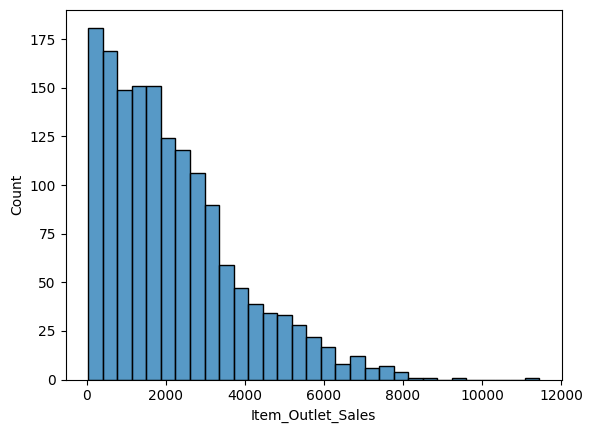

In [35]:
sns.histplot(data=num_df, x='Item_Outlet_Sales', y=None, hue=None,  stat='count', bins='auto')

<Axes: xlabel='Item_Weight', ylabel='Count'>

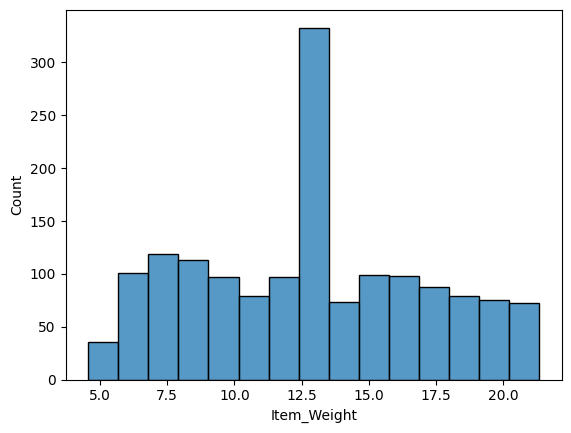

In [32]:
sns.histplot(data=num_df, x='Item_Weight', y=None, bins='auto')

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Weight'>

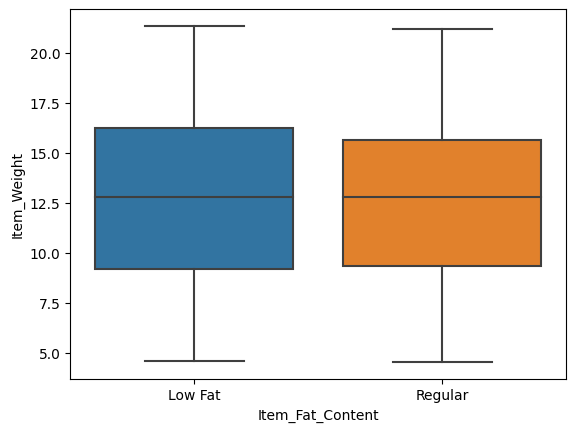

In [33]:
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Weight')

<Axes: xlabel='Outlet_Size', ylabel='Item_Weight'>

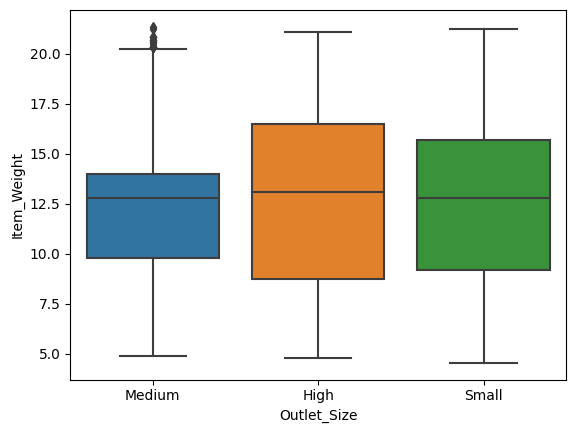

In [34]:
sns.boxplot(data=df, x='Outlet_Size', y='Item_Weight')


In [36]:
cor = num_df.corr()
cor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.007311,0.032480,0.017478,0.024650
Item_Visibility,-0.007311,1.000000,-0.010341,-0.078514,-0.114913
Item_MRP,0.032480,-0.010341,1.000000,0.029191,0.559511
Outlet_Establishment_Year,0.017478,-0.078514,0.029191,1.000000,-0.009587
Item_Outlet_Sales,0.024650,-0.114913,0.559511,-0.009587,1.000000


<Axes: >

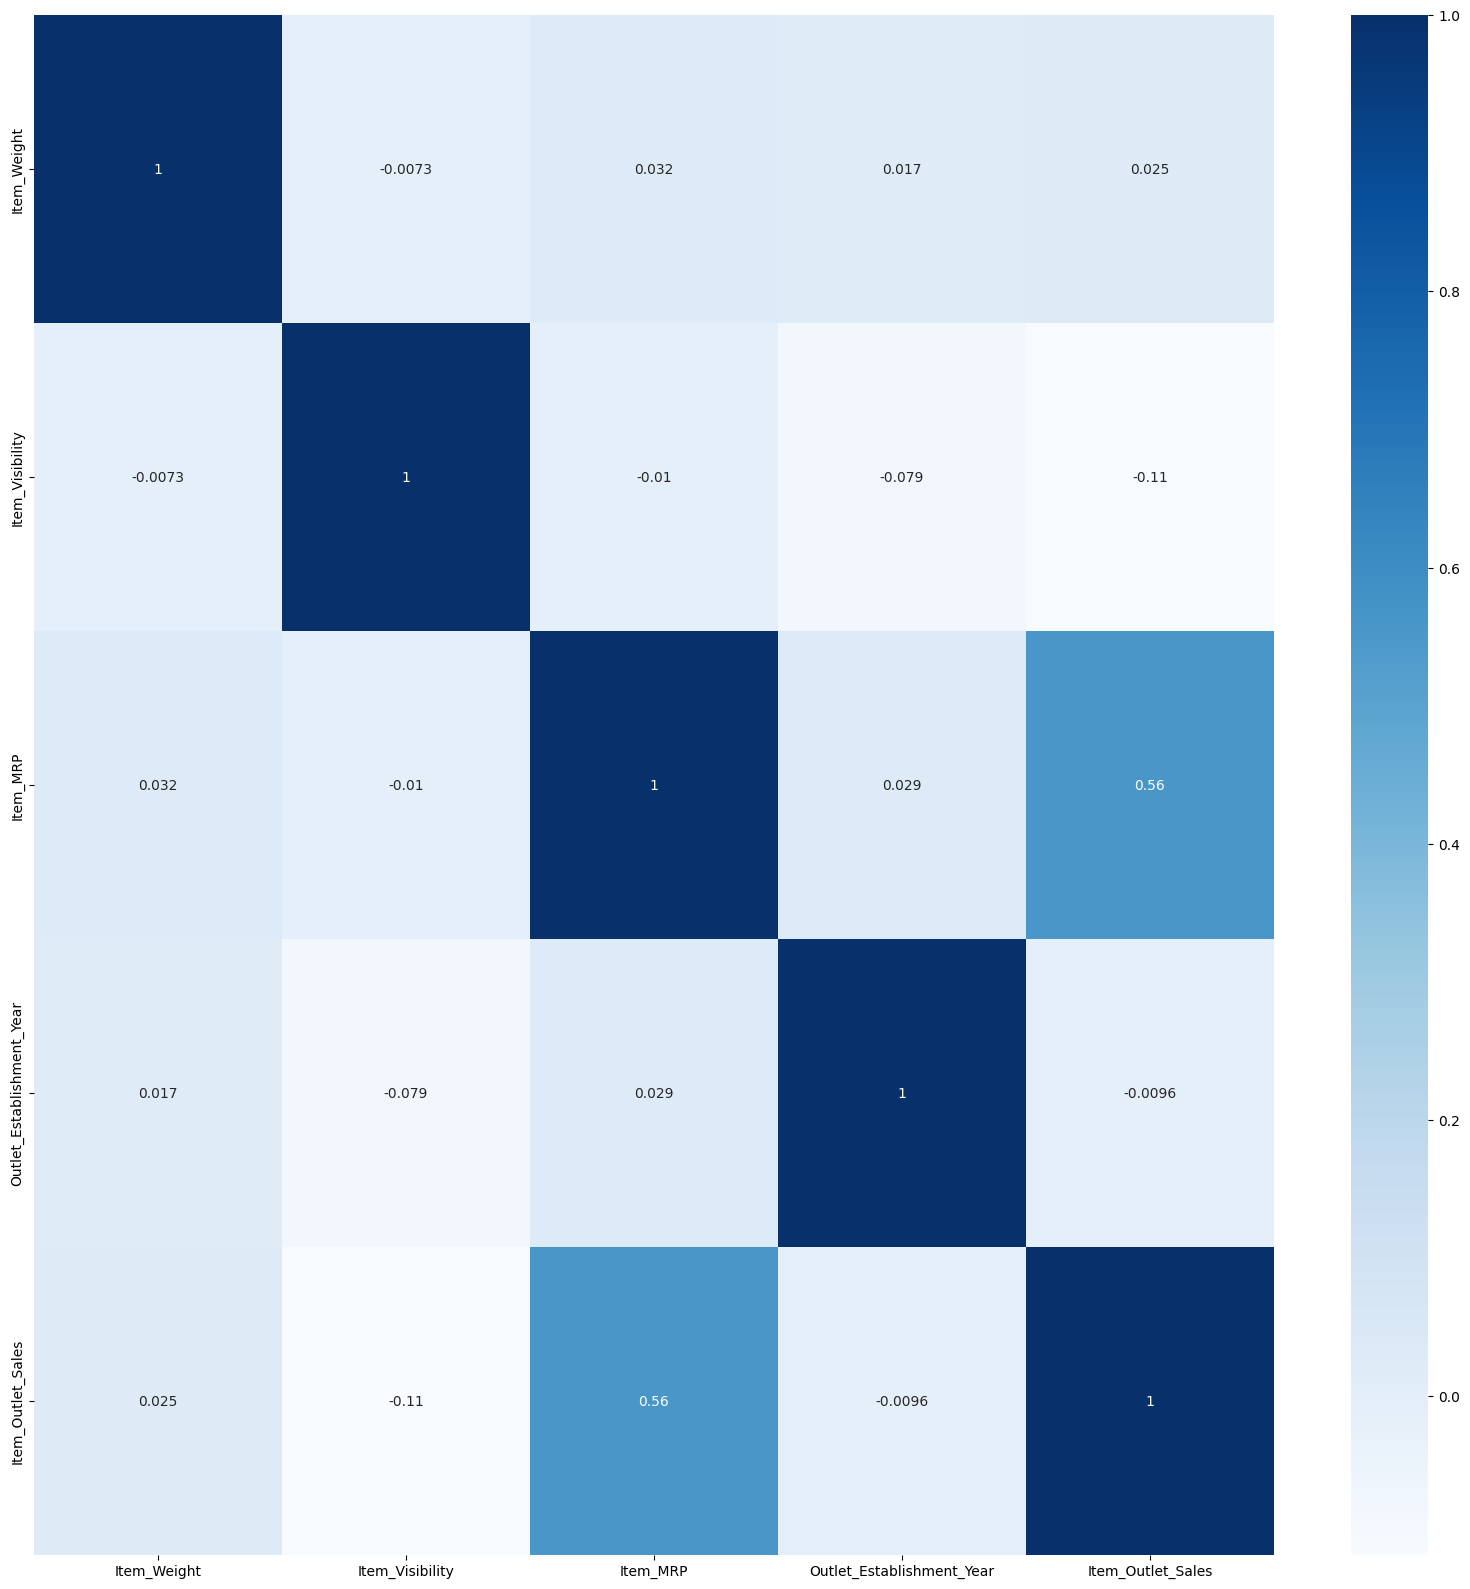

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(cor, cmap='Blues', annot=True)